# A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams
This is the code for the paper entitled "**A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams**" accepted in IEEE Internet of Things Magazine.  
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

**Notebook 2: Static machine learning algorithms**  
Aims:  
&nbsp; 1): Find the best performing static machine learning algorithm by considering both accuracy and time  
&nbsp; 2): Obtain the optimized learner using hyperparameter optimization techniques  

In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
import time
import warnings
warnings.filterwarnings("ignore")

## Read the NSL-KDD dataset

In [ ]:
#Read the training and test set
#df1 = pd.read_csv("NSL_KDD_binary_train.csv")
#df2 = pd.read_csv("NSL_KDD_binary_test.csv")

In [33]:
#Read the training and test set
df1 = pd.read_csv("/content/drive/MyDrive/NSL_KDD_binary_train.csv")
df2 = pd.read_csv("/content/drive/MyDrive/NSL_KDD_binary_test.csv")

In [34]:
X_train = df1.iloc[:, :-1].values
y_train = df1.iloc[:, -1].values
X_test = df2.iloc[:, :-1].values
y_test = df2.iloc[:, -1].values

In [5]:
X_test

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       [ 2.  , 53.  , 53.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.07,  0.07],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.44,  1.  ]])

## Training 5 static machine learning algorithms:
### KNN, LR, RF, XGBoost, LightGBM

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.97      0.60      0.74     12833

    accuracy                           0.76     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.76      0.76     22544

Accuracy: 0.7599804826117814


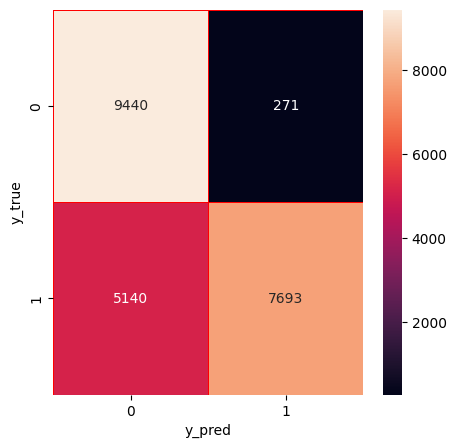

CPU times: user 32.9 s, sys: 130 ms, total: 33.1 s
Wall time: 21.5 s


In [6]:
%%time
# Print out execution time

# KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) # Model training
y_pred = classifier.predict(X_test) # Model testing
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.90      0.72      9711
           1       0.88      0.54      0.67     12833

    accuracy                           0.70     22544
   macro avg       0.74      0.72      0.70     22544
weighted avg       0.76      0.70      0.69     22544

Accuracy: 0.6990330021291696


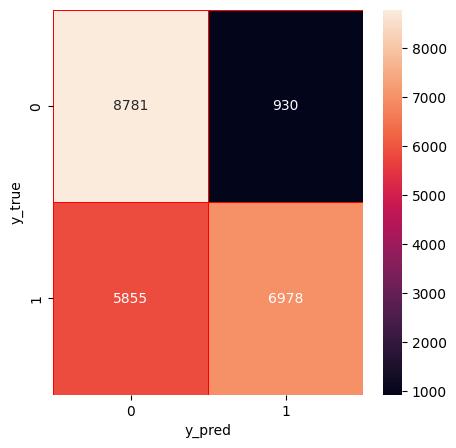

CPU times: user 6.54 s, sys: 2.1 s, total: 8.64 s
Wall time: 4.63 s


In [7]:
%%time
# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.97      0.61      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.83      0.77      0.76     22544

Accuracy: 0.7663236337828248


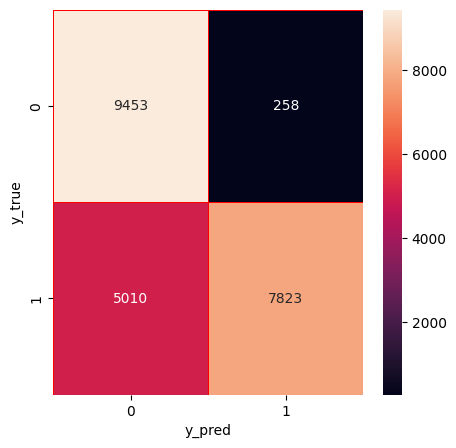

CPU times: user 13.3 s, sys: 135 ms, total: 13.5 s
Wall time: 13.5 s


In [8]:
%%time
# Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.67      0.97      0.80      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544

Accuracy: 0.7849982256919801
[[9454  257]
 [4590 8243]]


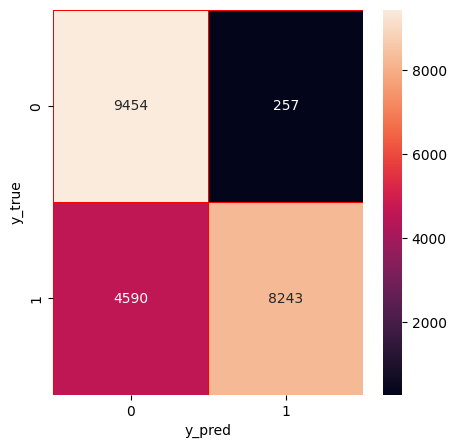

CPU times: user 4.47 s, sys: 76.4 ms, total: 4.54 s
Wall time: 2.6 s


In [9]:
%%time
# XGBoost algorithm
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

[LightGBM] [Info] Number of positive: 58630, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.154226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3911
[LightGBM] [Info] Number of data points in the train set: 125973, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465417 -> initscore=-0.138552
[LightGBM] [Info] Start training from score -0.138552
              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9711
           1       0.97      0.65      0.78     12833

    accuracy                           0.79     22544
   macro avg       0.83      0.81      0.79     22544
weighted avg       0.85      0.79      0.79     22544

Accuracy: 0.7910752306600426
Precision: 0.970244297788584
Recall: 0.6530039741291982


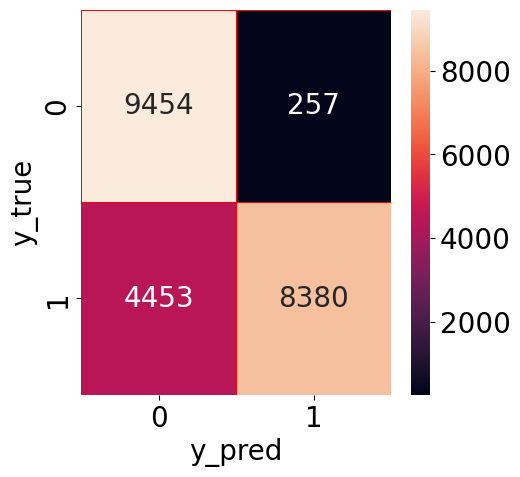

CPU times: user 3.63 s, sys: 64.9 ms, total: 3.7 s
Wall time: 8.36 s


In [35]:
%%time
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Considering both accuracy and execution time, **LightGBM** performs the best among the five algorithms:  
Accuracy: 79.35%, time: 0.6s.  

# Hyperparameter optimization
Tune the hyperparameters of LightGBM to obtain optimal accuracy.

#### Optimize LightGBM by Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE)

In [11]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate'])),
        "num_leaves": int(params['num_leaves']),
        "min_child_samples": int(params['min_child_samples']),
    }
    clf = lgb.LGBMClassifier( **params)
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return {'loss':-score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 20),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "learning_rate":hp.uniform('learning_rate', 0, 1),
    "num_leaves":hp.quniform('num_leaves',100,2000,100),
    "min_child_samples":hp.quniform('min_child_samples',10,50,5),
}

# Detect the optimal hyperparameter values
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("LightGBM: Hyperopt estimated optimum {}".format(best))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Number of positive: 58630, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3909
[LightGBM] [Info] Number of data points in the train set: 125973, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465417 -> initscore=-0.138552
[LightGBM] [Info] Start training from score -0.138552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

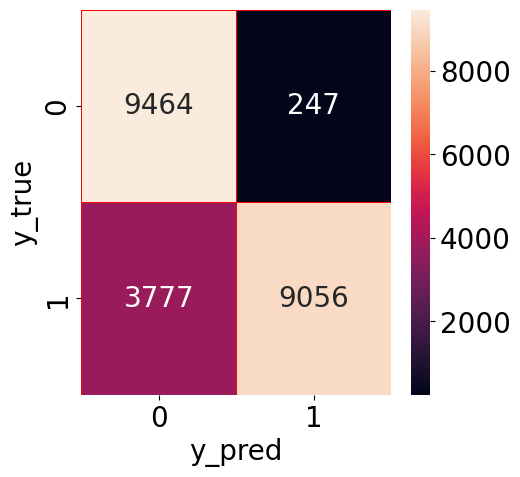

In [36]:
# Use the optimal hyperparameter values to train the optimized LightGBM model
clf = lgb.LGBMClassifier(max_depth=17, learning_rate= 0.007257702233332182, n_estimators = 100,
                         num_leaves = 1900, min_child_samples = 40)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Optimize LightGBM by particle swarm optimization (PSO)

In [14]:
!pip install Optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=ac5c581c5ce9eeddbf516817f21bc772b6109b7db7837ae4b23b4e1fa1dc15f9
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built Optunity


In [15]:
#PSO
import optunity
import optunity.metrics

# Define the hyperparameter configuration space
search = {
    'n_estimators': [50, 500],
    'max_depth': [5, 50],
    'learning_rate': (0, 1),
    "num_leaves":[100, 2000],
    "min_child_samples":[10, 50],
         }
# Define the objective function
def performance(n_estimators=None, max_depth=None,learning_rate=None,num_leaves=None,min_child_samples=None):
    clf = lgb.LGBMClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   learning_rate=float(learning_rate),
                                   num_leaves=int(num_leaves),
                                   min_child_samples=int(min_child_samples),
                                  )
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return score

# Detect the optimal hyperparameter values
optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=50,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Number of positive: 58630, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3906
[LightGBM] [Info] Number of data points in the train set: 125973, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465417 -> initscore=-0.138552
[LightGBM] [Info] Start training from score -0.138552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

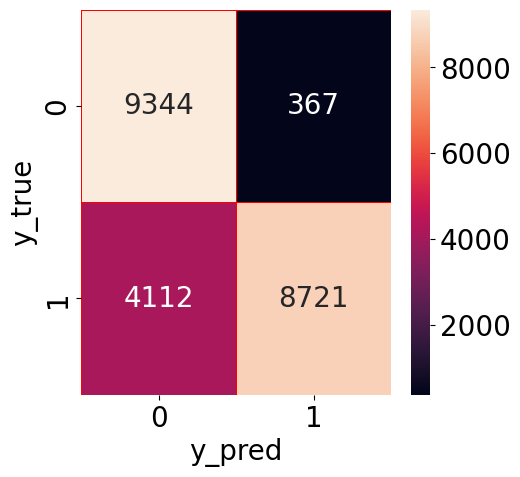

In [37]:
clf = lgb.LGBMClassifier(max_depth=9, learning_rate= 0.9014971441626215, n_estimators = 276,
                         num_leaves = 1866, min_child_samples = 49)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

After hyperparameter optimization, the accuracy of LightGBM can be improved from 79.35% to 80.69%.

### Save and load the optimized model

In [18]:
import joblib
# Output a pickle file to save the trained model
joblib.dump(clf, 'Optimized_lightGBM.pkl')

['Optimized_lightGBM.pkl']

In [19]:
# The trained model can be loaded directly for future testing
savestkrf = joblib.load('Optimized_lightGBM.pkl')

In [20]:
y_pred = savestkrf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9344  367]
 [4112 8721]]
              precision    recall  f1-score   support

           0       0.69      0.96      0.81      9711
           1       0.96      0.68      0.80     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

0.8013218594748048


However, the accuracy is still at a low level. A model with the accuracy of 80% cannot detect attacks accurately.

## Find the reason why the accuracy is low

Read the entire dataset (training+test)

In [38]:
#df = pd.read_csv("NSL_KDD_binary(train+test).csv")
df = pd.read_csv("/content/drive/MyDrive/NSL_KDD_binary(train+test).csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [28]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,0,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,0,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,0,0,0,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
148513,0,0,0,0,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
148514,0,0,0,0,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
148515,0,0,0,0,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, random_state = 0,shuffle=False)

[LightGBM] [Info] Number of positive: 6932, number of negative: 7919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3467
[LightGBM] [Info] Number of data points in the train set: 14851, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466770 -> initscore=-0.133117
[LightGBM] [Info] Start training from score -0.133117
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     69135
           1       0.99      0.93      0.96     64531

    accuracy                           0.96    133666
   macro avg       0.97      0.96      0.96    133666
weighted avg       0.96      0.96      0.96    133666

Accuracy: 0.9630571723549743
Precision: 0.9935074614505524
Recall: 0.929553237978646


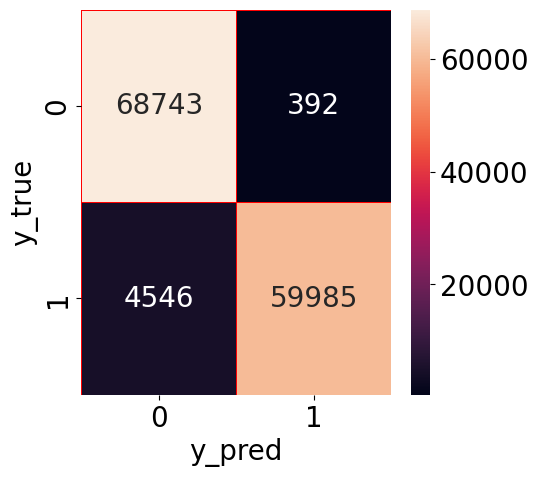

In [40]:
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Monitor how the accuracy changes over time

In [24]:
# Record the real-time accuracy based on timestamp/sample index
acc = []
acc_sum = 0
for i in range(0, len(y_test)):
    if y_test[i] == y_pred[i]:
        acc_sum = acc_sum + 1
    accuracy = acc_sum/(i+1)
    acc.append(accuracy)

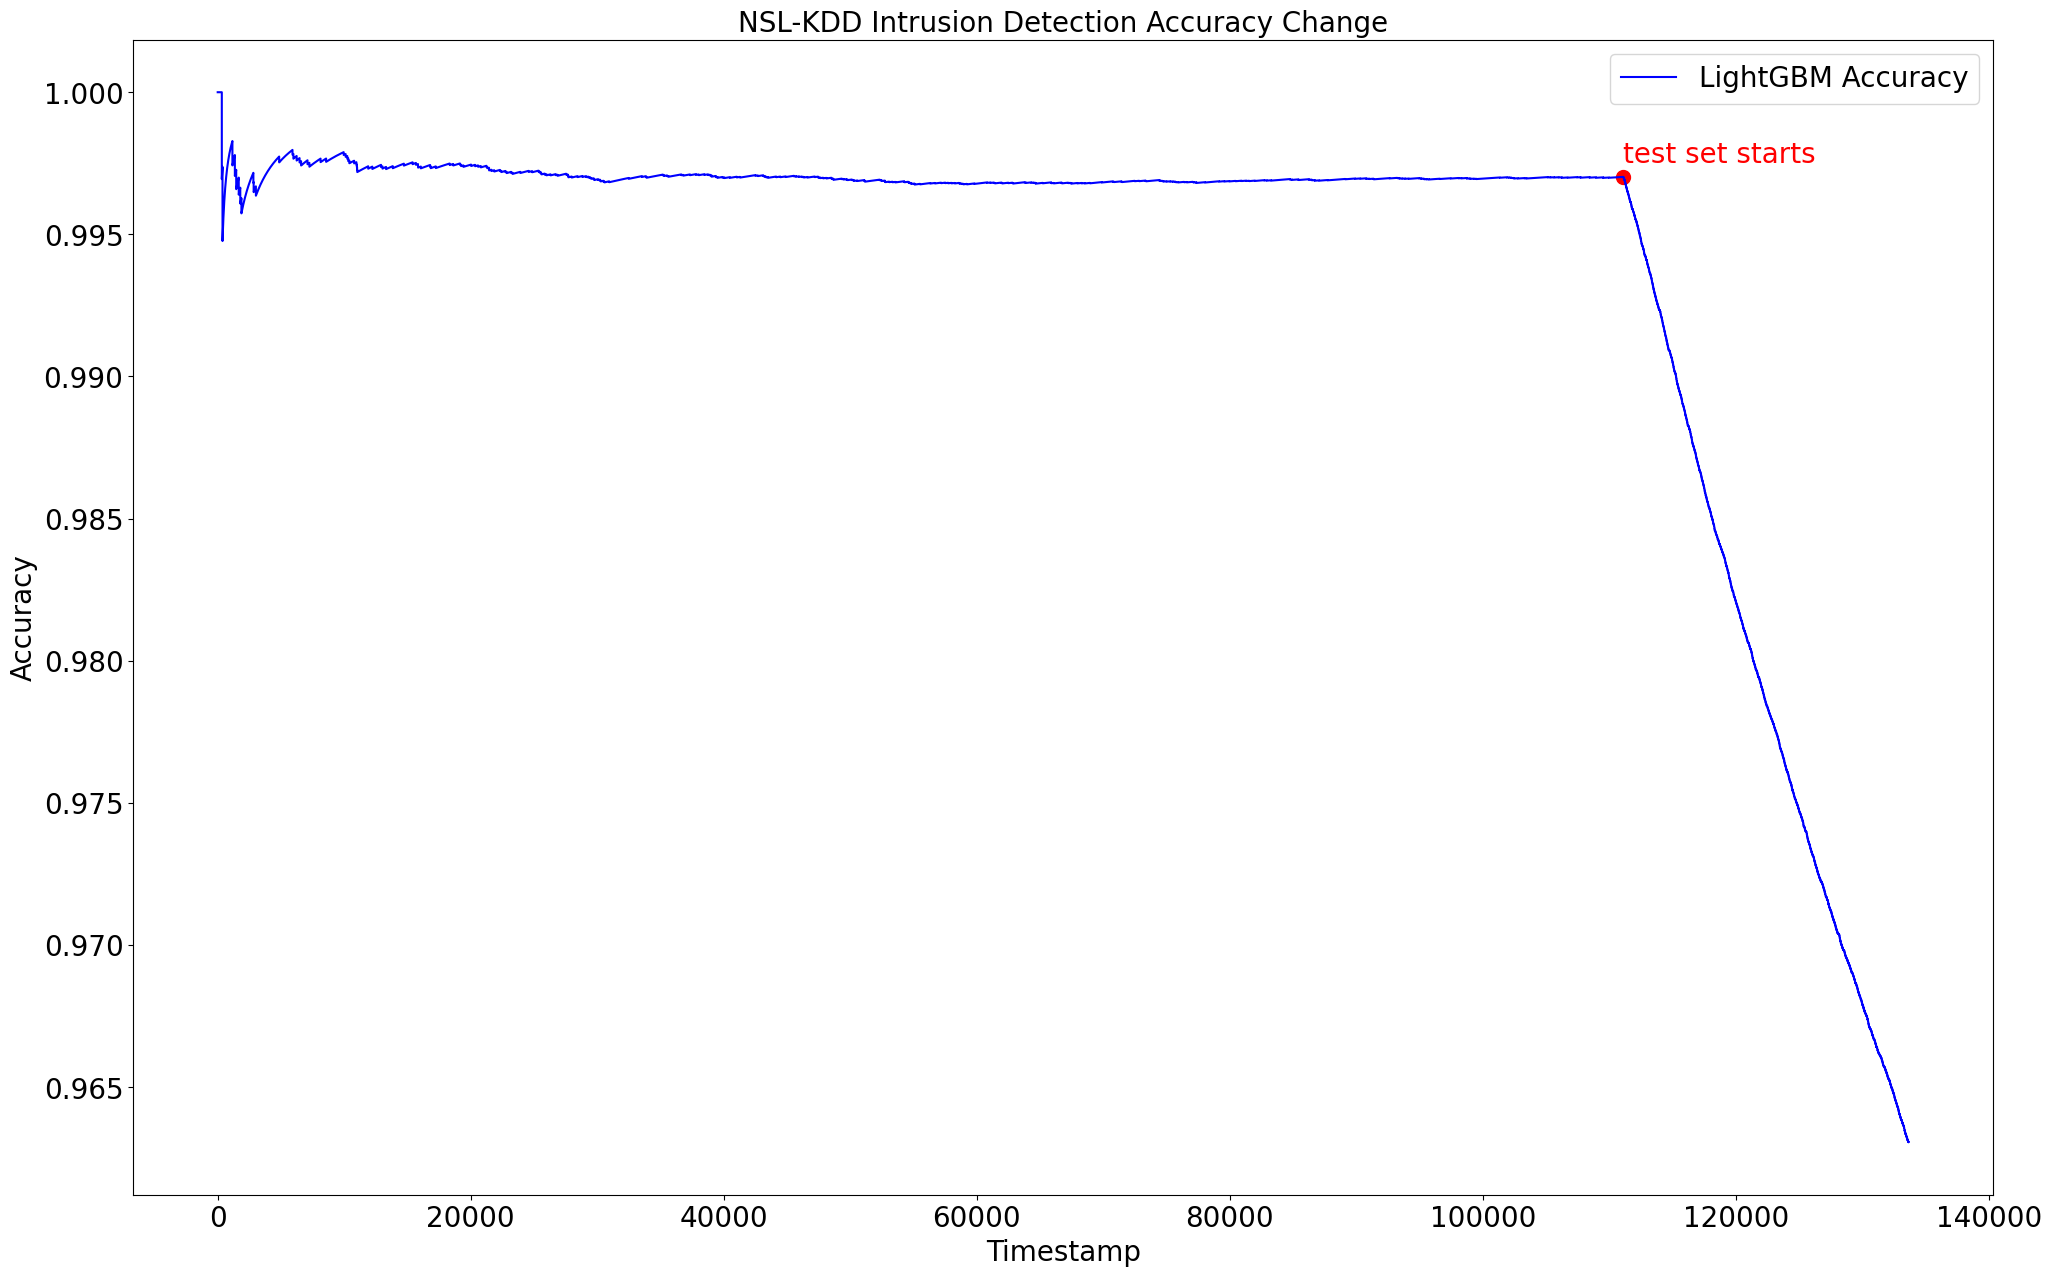

In [25]:
# Plot the accuracy changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(acc,'-b',label='LightGBM Accuracy')

plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('NSL-KDD Intrusion Detection Accuracy Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Accuracy')

plt.draw()

* The samples in the training set have similar statistical distribution. However, when the statistical distribution from the training set to the test set has changed. Hence, the model trained on the training set cannot accurately detect attacks in the test set.   
* In the figure, it can be seen that when the test set starts, the current accuracy starts to drop significantly due to the statistical distribution change in the dataset.  
* This kind of statistical distribution change is called **concept drift**.

In [45]:
# Record the real-time precision based on timestamp/sample index
precision = []
true_positives = 0
false_positives = 0

for i in range(0, len(y_test)):
    if y_pred[i] == 1 and y_test[i] == 1:
        true_positives += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        false_positives += 1

    if true_positives + false_positives == 0:
        current_precision = 1  # To handle the case where there are no positive predictions made yet
    else:
        current_precision = true_positives / (true_positives + false_positives)

    precision.append(current_precision)

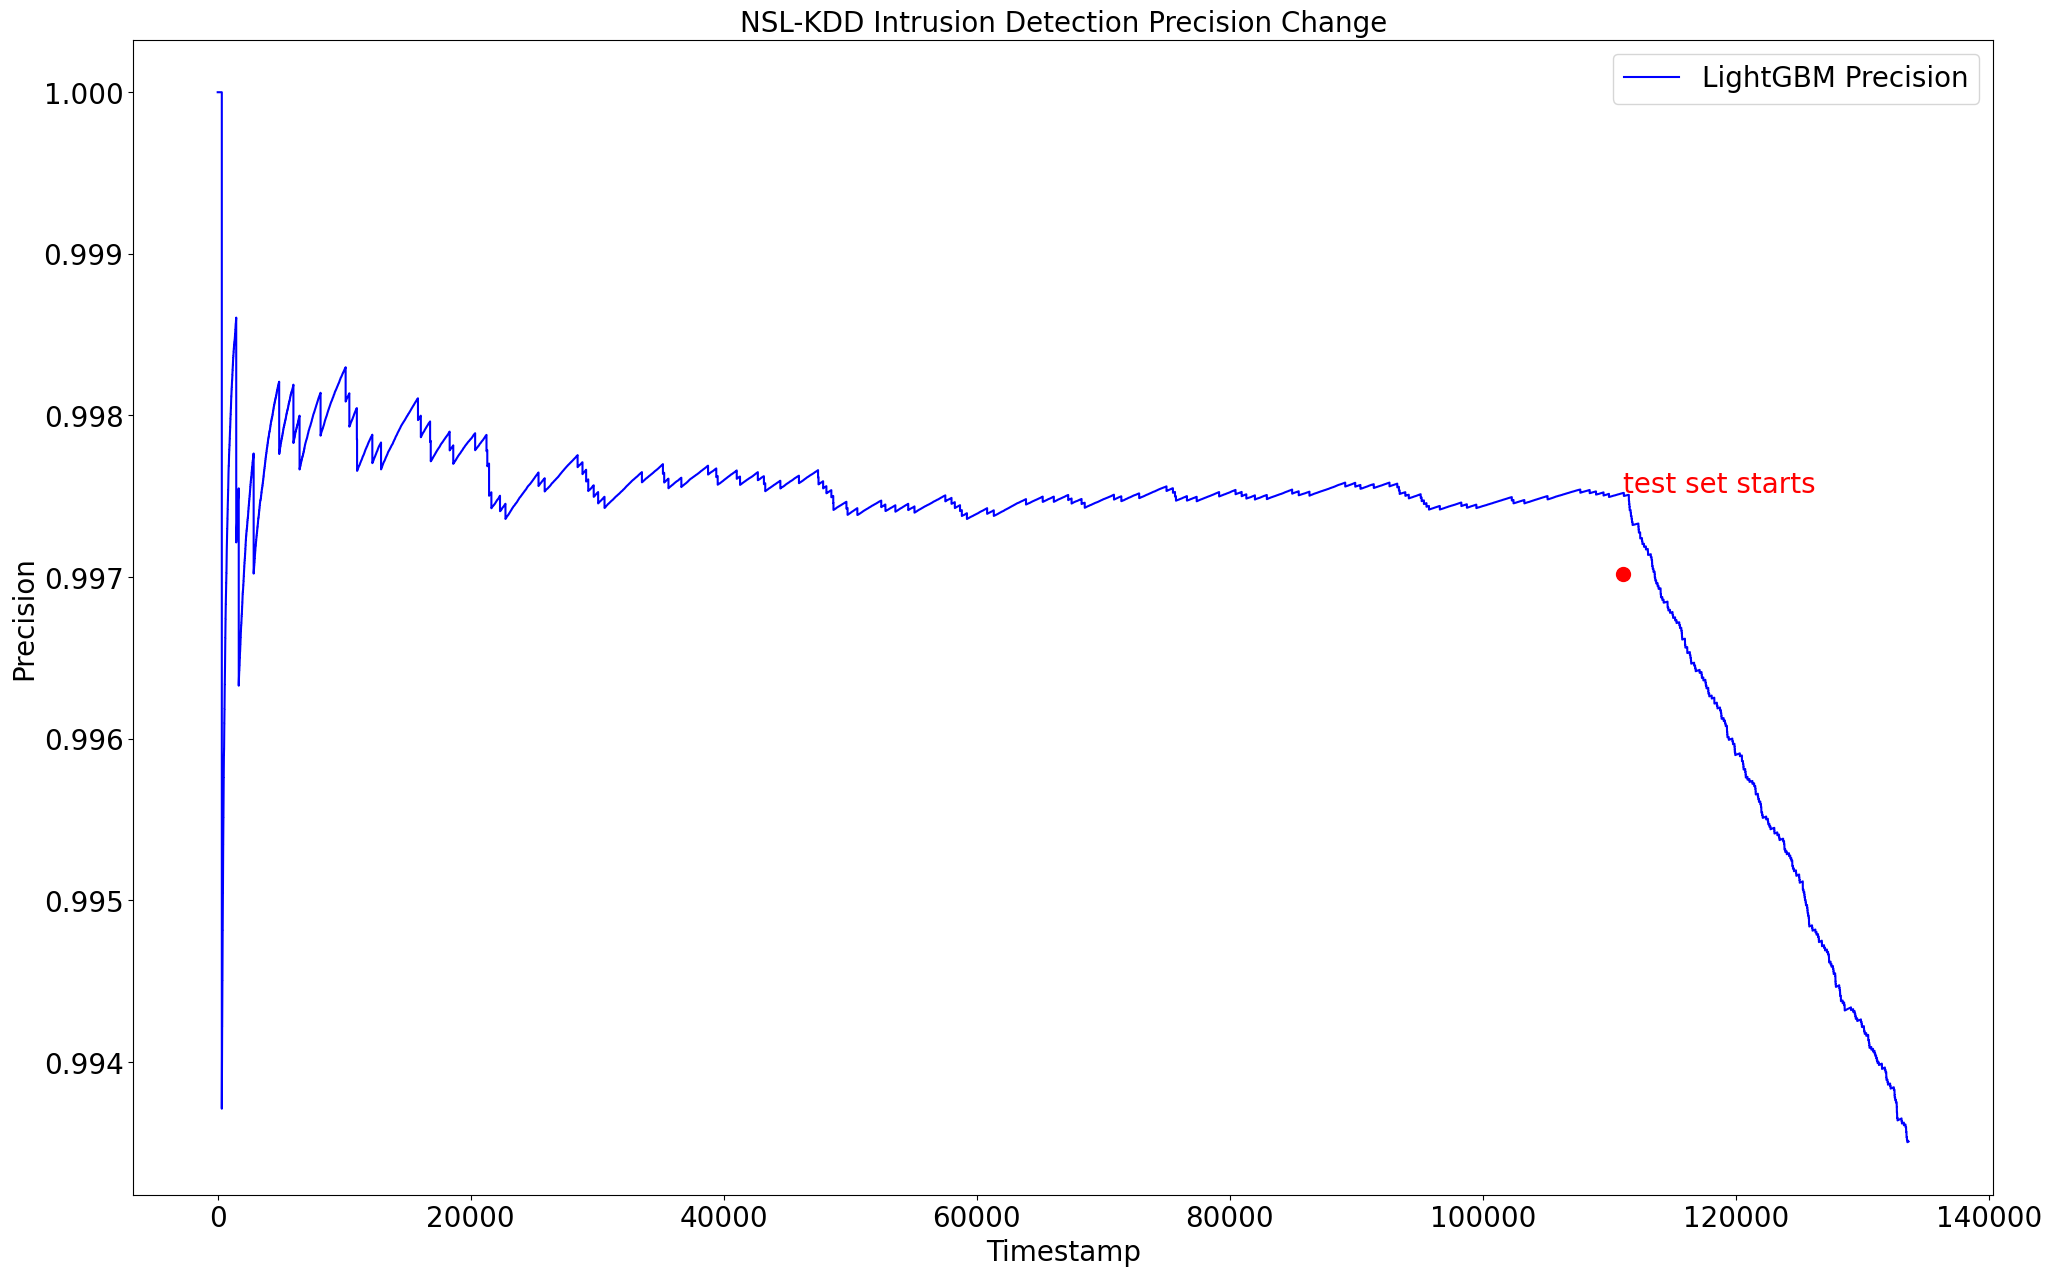

In [46]:
# Plot the precision changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(precision,'-b',label='LightGBM Precision')

plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('NSL-KDD Intrusion Detection Precision Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Precision')

plt.draw()

In [47]:
recall = []
true_positives = 0
false_negatives = 0

for i in range(0, len(y_test)):
    if y_pred[i] == 1 and y_test[i] == 1:
        true_positives += 1
    elif y_pred[i] == 0 and y_test[i] == 1:
        false_negatives += 1

    if true_positives + false_negatives == 0:
        current_recall = 1  # To handle the case where there are no positive instances in the actual data yet
    else:
        current_recall = true_positives / (true_positives + false_negatives)

    recall.append(current_recall)

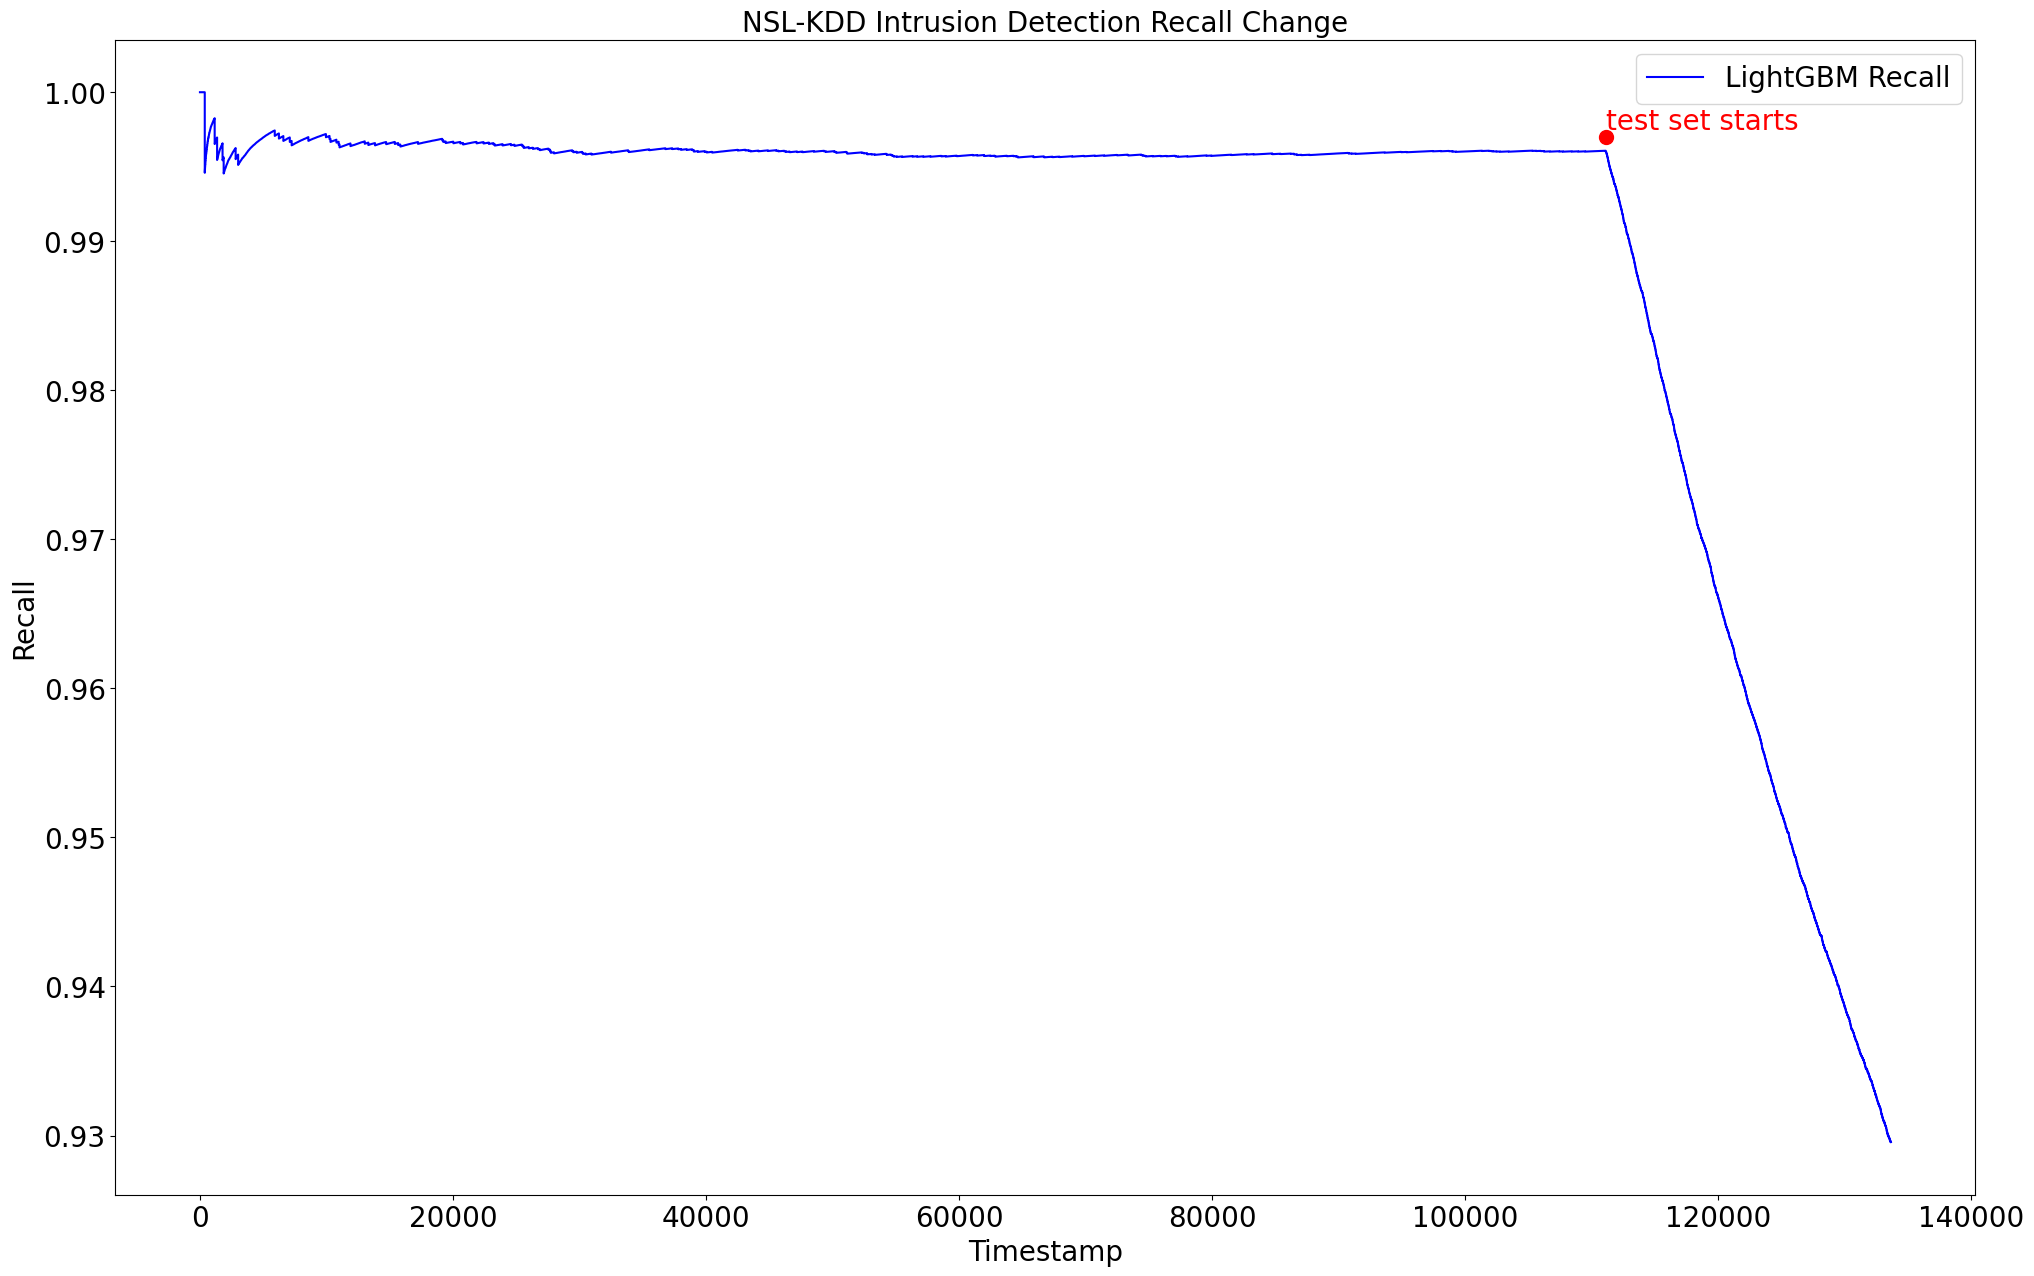

In [48]:
# Plot the precision changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(recall,'-b',label='LightGBM Recall')

plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('NSL-KDD Intrusion Detection Recall Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Recall')

plt.draw()